## Immediate Reward Prediction 
### Stateless environment, only one single state, two possible actions  $\mathcal{A} = \{L,R\}$

The update of our estimate $Q$ of the reward we can obtain doing A, that is, Q(A), is:

$Q(A) = Q(A) + \alpha(r - Q(A))$

This expression can also be writen as:

$Q(A) = (1-\alpha)Q(A) + \alpha r$

We prefer the first form as it highlights the role of the Temporal Difference error: the difference between the reward that we actually got and the one we predicted:

$TD_{error} = r - Q(A)$




In [1]:
import random
import matplotlib
import matplotlib.pyplot as plt

A = ['L','R']
Q = {'L':0, 'R':0}           # Q : A -> Value 
alfa = 0.1
R = {'L':1, 'R':0}    # The reward function belongs to the environment and is invisible to the agent 
print("Q:", Q)

Q: {'L': 0, 'R': 0}


In [2]:
random.choice(A)

'R'

In [3]:
td_list = []
for _ in range(100):
    a = random.choice(A)
    Q[a] = Q[a] + alfa*(R[a] - Q[a])
    if a == 'L':
        td_list += [R[a] - Q[a]]
print(Q)

{'L': 0.9912720364319122, 'R': 0.0}


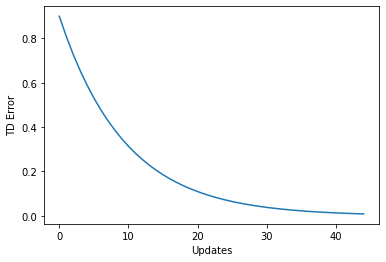

In [4]:
def plot(td_list):
    fig, ax = plt.subplots()
    plt.plot(td_list)
    ax.set_xlabel('Updates')
    ax.set_ylabel('TD Error')

plot(td_list)

Lets change the reward to the other arm of the T-Maze

In [5]:
R = {'L':0, 'R':1}

In [6]:
for _ in range(100):
    a = random.choice(A)
    Q[a] = Q[a] + alfa*(R[a] - Q[a])
    #print("Done", a, "  --> TD error: ", R[a] - Q[a])
    if a == 'L':
        td_list += [R[a] - Q[a]]
    
print(Q)

{'L': 0.0033518792480920715, 'R': 0.992144832788721}


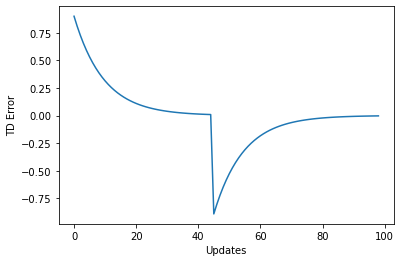

In [7]:
plot(td_list)

## Environment with states $\mathcal{S}=\{A,B,C\}$
Now the environment has states and precise transitions between them. We can go from A to B doing action $L$. We can go from A to C doing action $R$. There are no applicable actions in B and C as they are terminal states.

### We predict the future discounted reward instead of the immediate one 
The future discounted reward is the reward we just got $r$ plus the best we can do from the next state $S'$, that is, the maximum value over all available actions discounted by gamma ($\gamma\ \underset{a'\in A}{\max}Q(S',a')$).

The update after a new transition $S,A,S',r$ has been observed (action $A$ has been performed in $S$, we went to $S'$ and got $r$) goes as follows:

$Q(S,A) = Q(S,A) + \alpha(r + \gamma\ \underset{a'\in A}{\max}Q(S',a') - Q(S,A))$




In [26]:
# We define here the T-Maze seen in class

S = ['A','B','C']
R = {}
Q = {}
for s in S:
    for a in A:
        Q[(s,a)] = 0
        R[(s,a)] = 0

R[('B','L')] = 1     # positive reward for getting to B and doing L
R[('C','R')] = -10   # negative reward, predator in state C doing R 
gamma = 0.9

print("Q:",Q)
print("R:",R)

Q: {('A', 'L'): 0, ('A', 'R'): 0, ('B', 'L'): 0, ('B', 'R'): 0, ('C', 'L'): 0, ('C', 'R'): 0}
R: {('A', 'L'): 0, ('A', 'R'): 0, ('B', 'L'): 1, ('B', 'R'): 0, ('C', 'L'): 0, ('C', 'R'): -10}


In [27]:
print("Q Before:", Q)


td_list_A = []
td_list_B = []
for _ in range(500):    # trials loop    
    
    # decision on first junction
    S_current = 'A'
    a = random.choice(A)
    #print("Was in", S_current, "did action", a)
    S_next = 'B' if a == 'L' else 'C'  # transition function from environment
    
    q_max_S_next = max([Q[(S_next, a_)] for a_ in A])
    TD_error = R[(S_current,a)] + gamma*q_max_S_next - Q[(S_current,a)]
    Q[(S_current,a)] = Q[(S_current,a)] + alfa*TD_error
    
    if a == 'L':
        td_list_A += [TD_error]  # We track the TD error of state A after doing L

    S_current = S_next
    # decision on second junction (no need to discount as it is a terminal state)
    a = random.choice(A)
    #print("Was in", S_current, "did action", a)
    TD_error = R[(S_current,a)] - Q[(S_current,a)]
    Q[(S_current,a)] = Q[(S_current,a)] + alfa*TD_error

    if S_current == 'B' and a == 'L':  # We track the TD error of state B after doing L
        td_list_B += [TD_error]

print("Q After:", Q)

Q Before: {('A', 'L'): 0, ('A', 'R'): 0, ('B', 'L'): 0, ('B', 'R'): 0, ('C', 'L'): 0, ('C', 'R'): 0}
Q After: {('A', 'L'): 0.8999962850416046, ('A', 'R'): 0.0, ('B', 'L'): 0.9999982838462669, ('B', 'R'): 0.0, ('C', 'L'): 0.0, ('C', 'R'): -9.999993351268817}


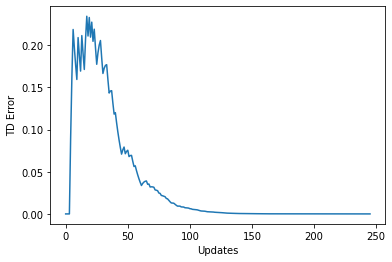

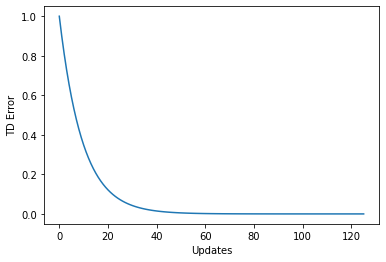

In [28]:
plot(td_list_A)
plot(td_list_B)